# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

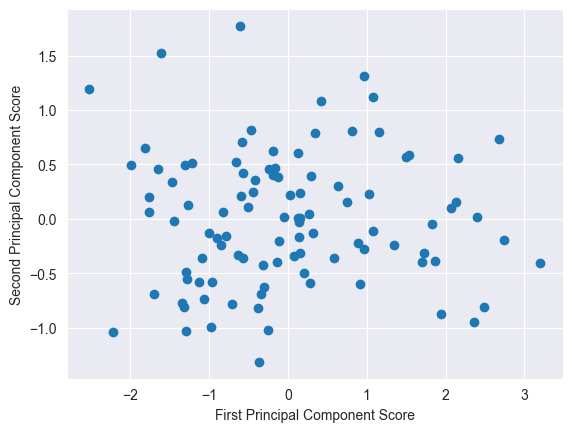

In [7]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

In [8]:
# Lets calculate the standard deviation so I can understand the threshold for scores so I know what I can call outliers
from sklearn import decomposition

# calculate standard deviations
std_devs = np.sqrt(pca3.explained_variance_)
print("Standard deviations for the three series:", std_devs)

# explained variance ratios
print("Explained variance ratio:", pca3.explained_variance_ratio_)

# rule to use upto one std deviation is low and normal , upto 2 std is medium and above 2 std deviation is high

print("Threshold for 'high' scores PC1:", 2 * std_devs[0])
print("Threshold for 'high' scores PC1:", 2 * std_devs[1])

#The results will help me interpret the outliers in the graph

Standard deviations for the three series: [1.24803603 0.60838364 0.1459544 ]
Explained variance ratio: [0.79916477 0.18990532 0.01092991]
Threshold for 'high' scores PC1: 2.496072065930896
Threshold for 'high' scores PC1: 1.2167672836863772


What can be said about the three outliers in the upper left corner of the graph?

- Response : The principal component is indicating variance direction and the max is showing up in the x axis  and the 2nd principal component is showing up in the y axis.  The three outliers are showing high values in the first principal component score and low values in the second principal component score which could be that the first principle who had the max contribution didnt have enough data points and had most contribution from series 1(dependent contributed 79.9%). The second principal component 18.99% contribution of variance and in that the 2nd seriese had the highest positive ratio. This could be due to the 1st series (independent data) didn have much contribution for the outlier items but the 2nd Seies contributed substantially to generation of the noise.


Is their first principal component score high or low?

- There are only 1-2 observation when compared on YAXIS which has higher than the threshold  of 2std ( i.e score beyond +/- 2.5) , which makes me believe its normal range. Based on the value calculated the first principal component is covering approximately 80% of variance and the 2nd one about 19% of variance. Boith togather more or less captures anything needed to analyze and train

What about their second principal component score?

- There are only few observation which has higher than the threshold  of 2std ( i.e score beyond +/- 2 * 0.608) , which makes me believe its normal .

What does that mean about their values in series_1, series_2, and series_3?

- The PC 1(biggest variance) weighted heavily by series 3 while least by series 3  . In PC2 (score 0.189) we see the max weight seriese 2 and also Seires 1 but least for series three. We also know that Pc2 Vector is orthogonal to PC1 vector.

It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?

- We know from te previous item the Series-3  is contributing max to the variance in one direction and ie due to the fact the data was synthetically created and its 1 more standard deviation than the series 1 which also has . Series 2 has only .1 std deviation which is a delta of 1/5th the original std deviation(so nearly similar to the series1 data) but Series three has twice the std deviation as noise and contributes most towards the variance in PC1. FOr PC2 the Series three - -vey contributing and Series 2 is positively but the Series 1 and Series two has std which are near to each other snd this cannot not be segregated much.


How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

- Overall due to the way the data is generated there is less variance(noise added with only 0.1 std deviation)  i.e high degree correlation between series a1 and 2 . The same is evedent in the pair plot where series 1 and 2 are showing linear dependency which a very high degree of correlation.  Seires three to Series 1 shows positive correlation but not similar data which is preferred.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

- From the scatter plot of the PC1 and PC2 we can see the score distribution of the observations and we can see the outliers but we didnt see any kind of clustering or any other interesting patterns.  The graph is not showing any interesting patterns and the outliers are not showing any interesting patterns. It also shows high distribution around mean of the data points.(standardised mean = 0). The biggest advantage is that form 3 features(three series) we can reduce the dimensionality of the data to 2 dimensions and see the variance direction.

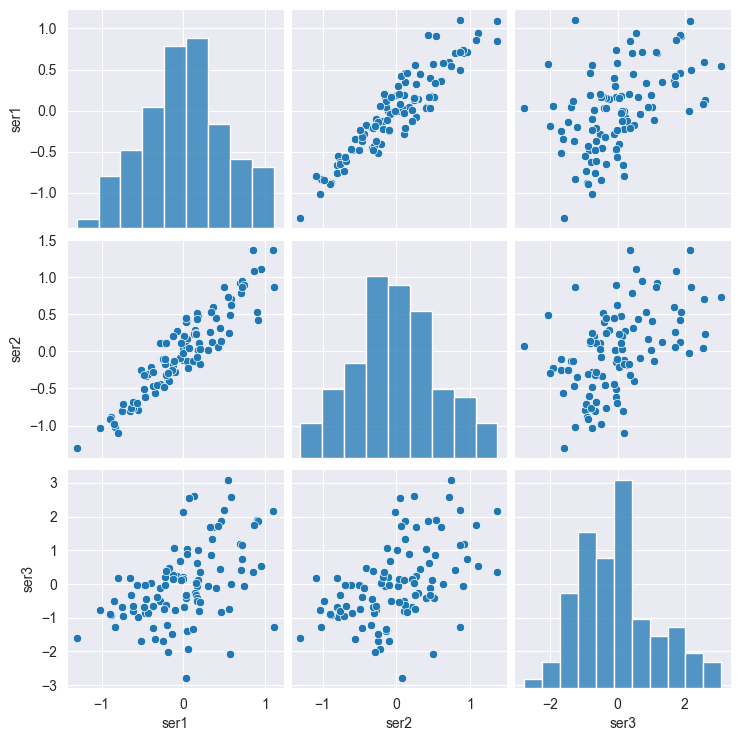

In [9]:
# Create a pairplot
import seaborn as sns
sns.pairplot(df)
plt.show()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

### Answers to these questions are given below

In [10]:
### let me use a retail data set(favorita dataset identified by one of my team member and also a dataset of spam email(given as a part of assigned dataset) two different domain so I can understand better

In [11]:
#import the notebook so as this notebook remains clean and only do the data analysis and graphing. Using dataset identified by my previous group member Kristina T
%run "Favorita Stores.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
It worked!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date 

/var/folders/bm/9gklnwns2kxcypy3sp68vlc80000gn/T/ipykernel_38890/66222452.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_until_holiday'].fillna(23, inplace=True)
/var/folders/bm/9gklnwns2kxcypy3sp68vlc80000gn/T/ipykernel_38890/66222452.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

          city                     locale_name      state
0        Quito                         Ecuador  Pichincha
1        Quito                           Manta  Pichincha
2        Quito                        Cotopaxi  Pichincha
3        Quito                          Cuenca  Pichincha
4        Quito                        Libertad  Pichincha
..         ...                             ...        ...
523  El Carmen  Santo Domingo de los Tsachilas     Manabi
524  El Carmen                     Santa Elena     Manabi
525  El Carmen                           Quito     Manabi
526  El Carmen                            Loja     Manabi
527  El Carmen                         Salinas     Manabi

[528 rows x 3 columns]
city           False
locale_name    False
state          False
dtype: bool
Number of NaN values per column:
city           0
locale_name    0
state          0
dtype: int64
Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion, city, state, type_x, cluster, tra

In [13]:
df_favorita_week9 = final_df.copy()

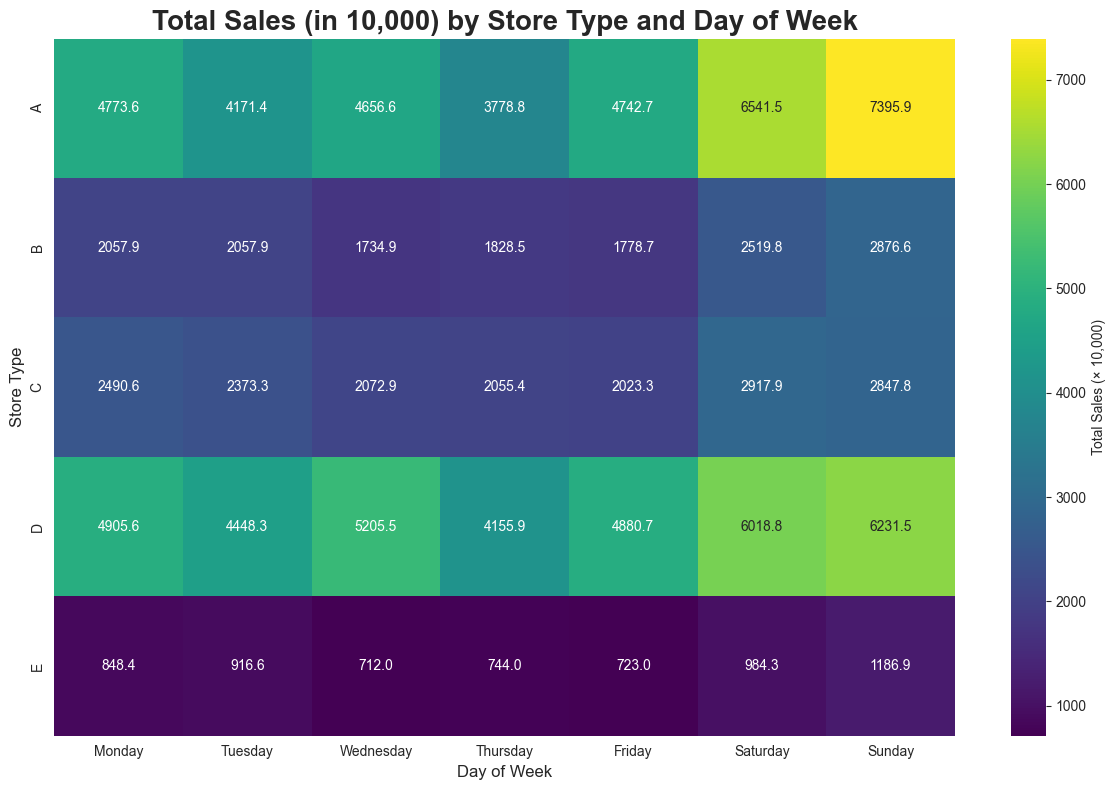

In [14]:
#show transactions in multiple of 10000
scale_factor = 10000
#  new dataframe with only needed columns
df_sales = df_favorita_week9[['date', 'sales', 'type_x']].copy()

df_sales['day_of_week'] = df_sales['date'].dt.day_name()
sales_pivot = df_sales.pivot_table(
    values='sales',
    index='type_x',
    columns='day_of_week',
    aggfunc='sum'
) / scale_factor

# let me reorder columns using the same order as day_sales_series
sales_pivot = sales_pivot.reindex(
    columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot,
            annot=True,
            fmt='.1f',
            cmap='viridis',
            annot_kws={"size": 10},
            cbar_kws={'label': f'Total Sales (× {scale_factor:,})'})

plt.title('Total Sales (in 10,000) by Store Type and Day of Week', fontsize=20, weight='bold')
plt.xlabel('Day of Week',fontsize=12)
plt.ylabel('Store Type',fontsize=12)
plt.tight_layout()
plt.show()



In [15]:
df_sales = df_favorita_week9[['date', 'sales', 'family']].copy()
# add month column
df_sales['month'] = df_sales['date'].dt.month_name()
# create pivot table for the heatmap
sales_pivot_month = df_sales.pivot_table(
    values='sales',
    index='family',
    columns='month',
    aggfunc='sum'
) / scale_factor

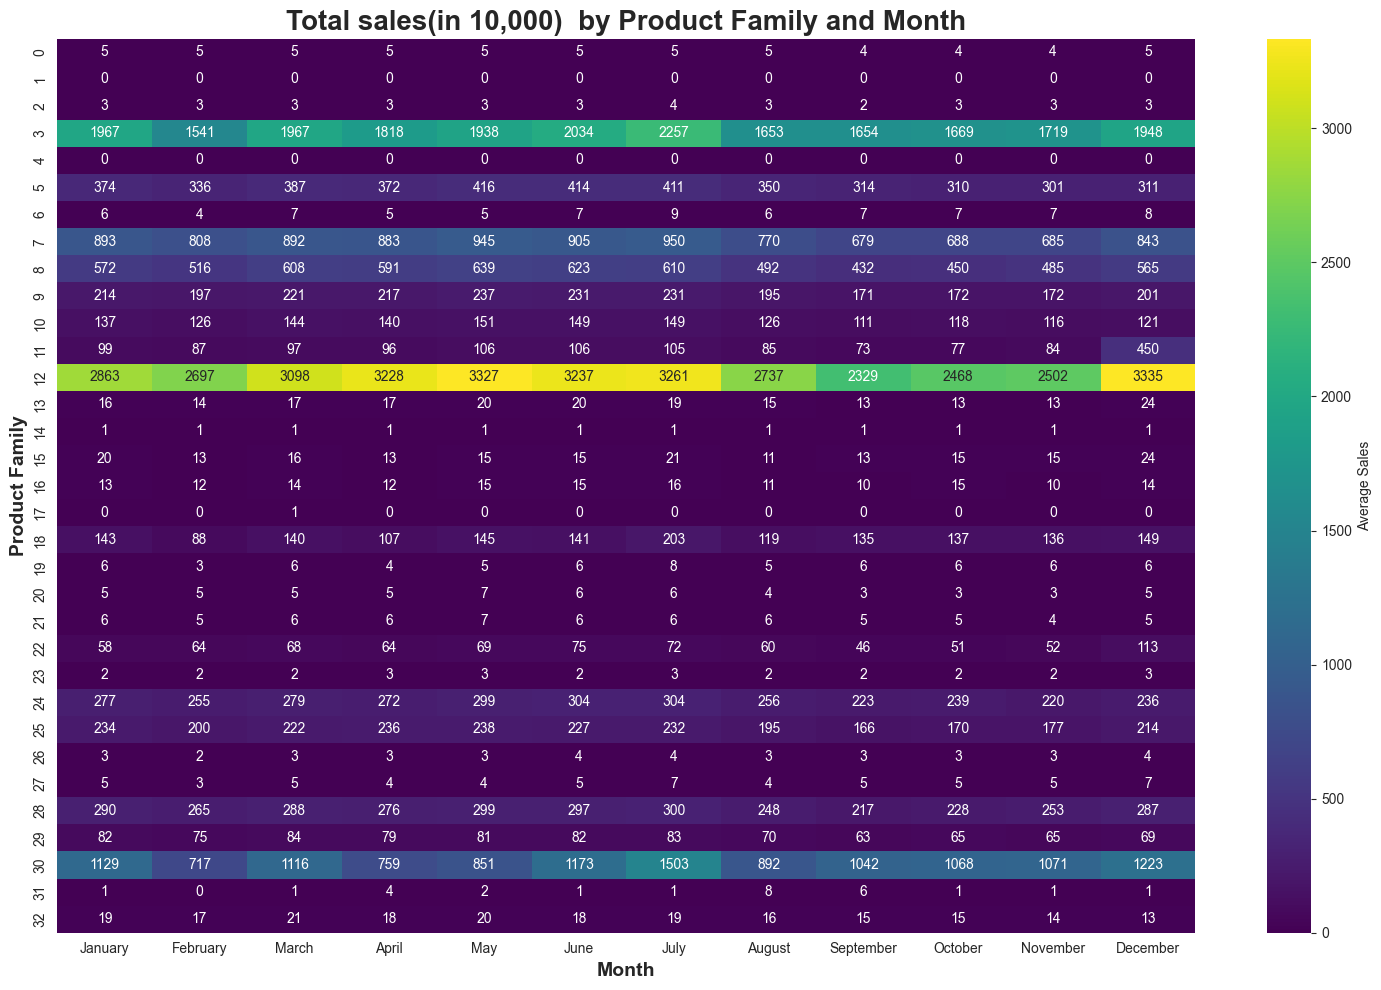

In [17]:
# Reorder columns for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sales_pivot_month = sales_pivot_month.reindex(columns=month_order)

plt.figure(figsize=(15, 10))
sns.heatmap(sales_pivot_month,
            annot=True,
            fmt='.0f',
            cmap='viridis',
            annot_kws={"size": 10},
            cbar_kws={'label': 'Average Sales'})
plt.title('Total sales(in 10,000)  by Product Family and Month', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=14, weight='bold')
plt.ylabel('Product Family', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

### Generate Seaborn plot - Sales v/s Transaction by store type

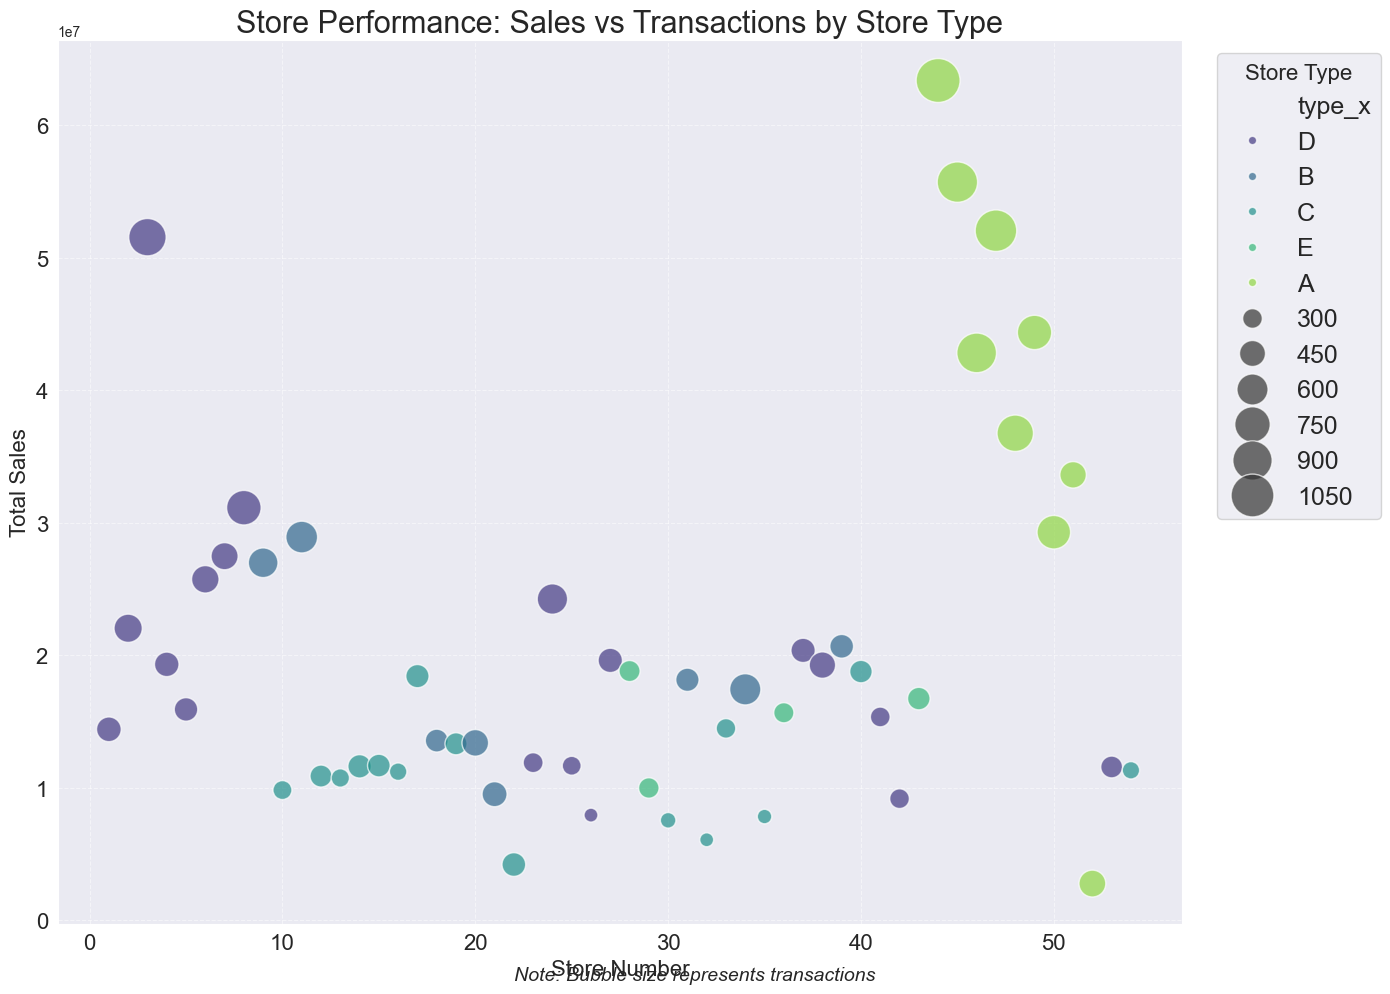

In [18]:
# create new dataframe with aggregated data
store_performance = df_favorita_week9.groupby(['store_nbr', 'type_x']).agg({
    'sales': 'sum',
    'transactions': 'sum'
}).reset_index()
plt.figure(figsize=(14, 10))

size_min = store_performance['transactions'].min()
size_max = store_performance['transactions'].max()
store_performance['bubble_size'] = 200 + 900 * ((store_performance['transactions'] - size_min) / (size_max - size_min))

# scatter plot with bubbles sized by transactions
scatter = sns.scatterplot(
    data=store_performance,
    x='store_nbr',
    y='sales',
    hue='type_x',  # Color by store type
    size='bubble_size',  # Size by normalized transactions
    sizes=(100, 1000),  # Min and max size of points
    alpha=0.7,  # Add some transparency
    palette='viridis',  # Use a colorful palette
    legend='brief'
)

 # add standard stuff needed for plota
plt.title('Store Performance: Sales vs Transactions by Store Type', fontsize=22)
plt.xlabel('Store Number', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

handles, labels = scatter.get_legend_handles_labels()
size_handles = [h for h in handles if h.get_label() == 'bubble_size']
plt.legend(handles=[h for h in handles if h not in size_handles],
           labels=[l for l in labels if l != 'bubble_size'],
           title='Store Type', title_fontsize=16, fontsize=18,
           bbox_to_anchor=(1.02, 1), loc='upper left')


plt.grid(True, linestyle='--', alpha=0.5)

plt.figtext(0.5, 0.01, "Note: Bubble size represents transactions",
           fontsize=14,va= 'bottom', ha='center', style='italic')

plt.tight_layout()
plt.show()

### Generate Seaborn plot - store perfromance by location

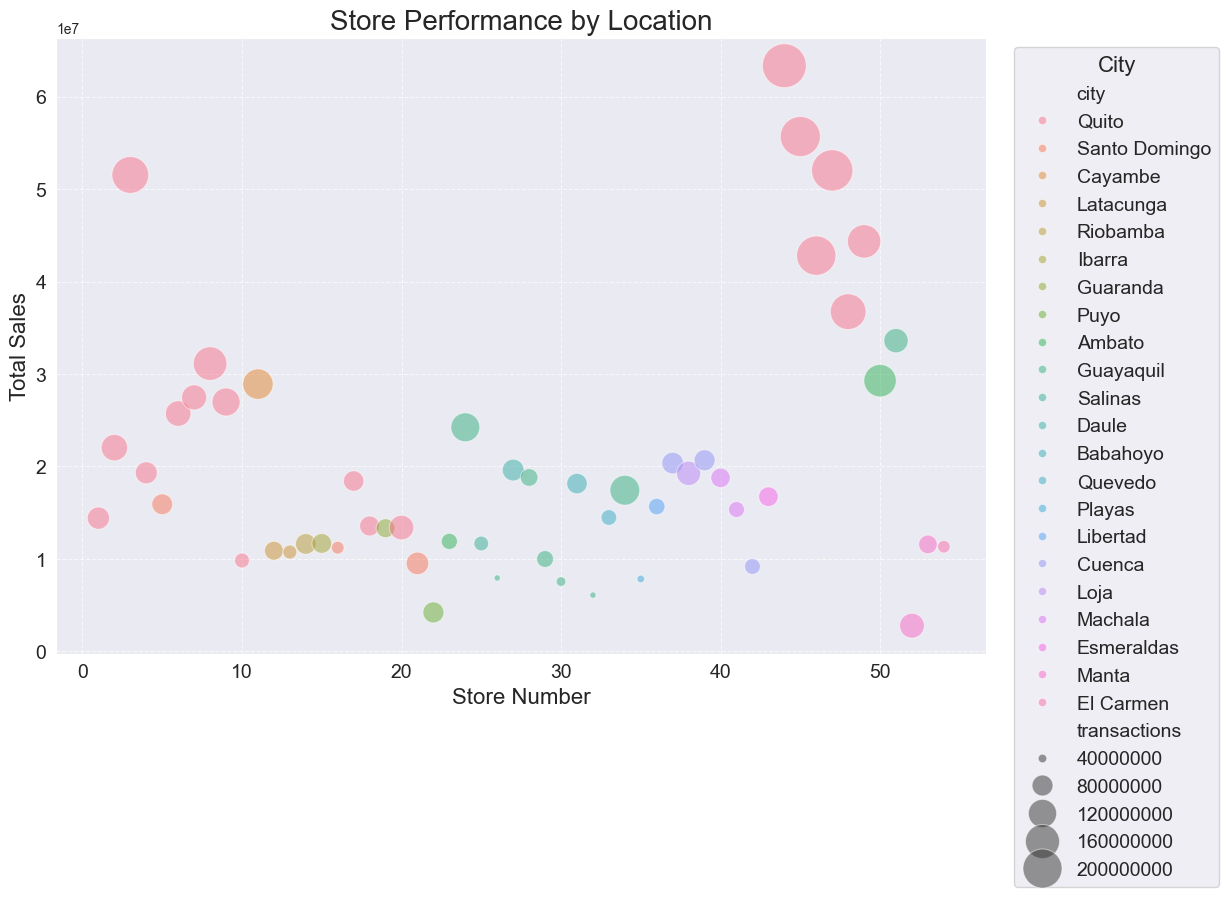

In [19]:

store_location_performance = df_favorita_week9.groupby(['store_nbr', 'type_x', 'city']).agg({
    'sales': 'sum',
    'transactions': 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=store_location_performance,
    x='store_nbr',
    y='sales',
    hue='city',  # Color by city
    size='transactions',  # Size by transactions
    sizes=(20, 1000),  # Min and max size of points
    alpha=0.5,  # Add some transparency
    legend='brief'
)

plt.title('Store Performance by Location', fontsize=20)
plt.xlabel('Store Number', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
handles, labels = scatter.get_legend_handles_labels()
size_handles = [h for h in handles if h.get_label().startswith('transactions')]
plt.legend(handles=handles[:-len(size_handles)], labels=labels[:-len(size_handles)],
           title='City', title_fontsize=16, fontsize=14,
           bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)



### Perform PCA on the Favorita dataset and analyze step by step so I can use linear regression later


In [20]:
# perform PCA on the favorita dataset
from sklearn.preprocessing import StandardScaler

# select numeric columns and remove any constant and categorical columns... PCA works with numeric data
numeric_cols = final_df_encoded.select_dtypes(include=['float64', 'int64']).columns
df_numeric = final_df_encoded[numeric_cols].copy()
df_numeric.drop(columns=['sales'], inplace=True, errors='ignore')
df_numeric = df_numeric.fillna(df_numeric.mean())
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

pca_n = decomposition.PCA()
pca_n.fit(data_scaled)

PCA()

In [21]:
# Let me find the PCA needed to get threshold accuracy ie cumulative variance 0.9
threshold_cumulative_ratios = 0.9 #90%
cumulative_variance_ratio = np.cumsum(pca_n.explained_variance_ratio_)

n_components_threshold = np.argmax(cumulative_variance_ratio >= threshold_cumulative_ratios) + 1
print(f"Number of components needed for {threshold_cumulative_ratios*100}% variance: {n_components_threshold}")

print("\nCumulative variance ratio:")
for i, ratio in enumerate(cumulative_variance_ratio):
	if i <= 5:
		print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")
	else:
		print(f"There are lot of PCA components needed to get to {threshold_cumulative_ratios * 100} %, total PC vectors :{len(cumulative_variance_ratio)}  data may not be suitable for PCA or has complex relationship" )
		break


Number of components needed for 90.0% variance: 79

Cumulative variance ratio:
PC1: 0.0344 (3.44%)
PC2: 0.0645 (6.45%)
PC3: 0.0914 (9.14%)
PC4: 0.1174 (11.74%)
PC5: 0.1417 (14.17%)
PC6: 0.1648 (16.48%)
There are lot of PCA components needed to get to 90.0 %, total PC vectors :157  data may not be suitable for PCA or has complex relationship


In [22]:
# Create loadings DataFrame
n_components_threshold = pca_n.n_components_
feature_names = df_numeric.columns
loadings = pd.DataFrame(
    pca_n.components_.T,  # shape: [n_features, n_components]
    columns=[f'PC{i+1}' for i in range(n_components_threshold)],
    index=feature_names
)


In [24]:
# print feature contribution for each Principal Component
print("\nFeature contributions to each PC:")
for pc in range(n_components_threshold):
   print(f"\nPC{pc+1} contributions (explains {pca_n.explained_variance_ratio_[pc]*100:.2f}% of variance):")
   contributions = loadings[f'PC{pc+1}'].sort_values(ascending=False)

   #for feat, contrib in contributions.items():
       #print(f"{feat}: {contrib:.4f}")
   break                                # there are way too many so showing only ist PCA


Feature contributions to each PC:

PC1 contributions (explains 3.44% of variance):


- Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

When I did only one principal component I found only 22% correlation for PCA1 (then decided to look for all principal components to understand the distribution of variance) and then once I removed categorical data columns then PC1 was giving 35.56% variance. As the variance indicated in PCA1 was not good so I looked into all the PCA(on researching I see that in retail this is normal) . Below is the contribution of the first Principal component:


PC1 contributions (explains 35.56% of variance):

id: 0.6776

onpromotion: 0.2993

is_holiday: 0.0968

store_nbr: -0.0018

cluster: -0.0028

family: -0.0181

transactions: -0.0216

dcoilwtico: -0.6642


### Conclusions:
- Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not usable, find some new data!

Since there are multiple factors which determine retail sales its evident that we need multiple principal component due to complex relationships. When we see four components we see we are able to get 90% of the variance covered. While original  data after merging and joining had 17 columns we can actually use only four principal components to train our model. We sww the sales are positively correlated to specific items (id), if its on promotion and if its holiday. We also see its negatively correlated to oil price which looks natural as people have less disposable income to spend on as they spend more to buy oil and also its inflationary effect

- Do you see any outliers? (Data points that are far from the rest of the data).

Yes there are outliers as couple of stores have very low sales and that needs to be looked into

- Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Yes we can use four components to do 90% variance coverage but retails has complex relationships and it is also time series having multiple complex dependencies so this doing PCA which is better for less complex data may not give us very good results and we have have to look into other techniques as well. We started with 17 columns and we are now seeing we can use for principal components for the observations from dataset to train very quickly. We do see the feature related variances are more  due to few columns and we can use it in training models


In [25]:
# for the final_df_encoded dataframe create the correlation matrix
#drop the sales data


In [26]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#  create feature matrix X
X = final_df_encoded.select_dtypes(include=['int64', 'float64'])
X.drop(columns="sales", inplace=True)
y = final_df_encoded['sales']

#   substitute missing values with mean
X = X.fillna(X.mean())
y = y.fillna(y.mean())


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  train linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#   evaluate model
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print("Model Performance:")
print(f"Training R² score: {train_score:.4f}")
print(f"Testing R² score: {test_score:.4f}")



Model Performance:
Training R² score: 0.5862
Testing R² score: 0.5886


In [27]:
#with cross validation
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline    #only if we do pipeline

# Create feature matrix X
X = final_df_encoded.select_dtypes(include=['int64', 'float64'])
X.drop(columns="sales", inplace=True)
y = final_df_encoded['sales']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

model = LinearRegression()

# I will use 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV R² Scores: {np.std(cv_scores):.4f}")

# let me use pipeline with preprocessing steps to reduce coding
# this will create a  pipeline that scales the data and then applies linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19
)
pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print("\nFinal Model Performance :")
print(f"Training R² score: {train_score:.4f}")
print(f"Testing R² score: {test_score:.4f}")

Cross-Validation R² Scores: [0.64303713 0.36802474 0.39497467 0.6622812  0.48042645]
Mean CV R² Score: 0.5097
Standard Deviation of CV R² Scores: 0.1226

Final Model Performance :
Training R² score: 0.5862
Testing R² score: 0.5886


#### The same code without one hot coding did much worse with most of the PCA variance(95% 10 PCA) included  gave us max

Model Performance with PCA transformed vector of 78 components:
Training R² score with PCA : 0.0567
Testing R² score with PCA : 0.0556

In [28]:
# apply PCA to training data only , opt for 78 as it gives us 90% variance

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=19
)
pca = PCA(n_components=78)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

# Transform test data using the same PCA model
X_train_pca_transformed = pca.transform(X_train_scaled)
X_test_pca_transformed = pca.transform(X_test_scaled)

# Train linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Evaluate model
train_score = model.score(X_train_pca_transformed, y_train)
test_score = model.score(X_test_pca_transformed, y_test)
print("Model Performance with PCA transformed vector of 78 components:")
print(f"Training R² score with PCA : {train_score:.4f}")
print(f"Testing R² score with PCA : {test_score:.4f}")



Model Performance with PCA transformed vector of 78 components:
Training R² score with PCA : 0.4204
Testing R² score with PCA : 0.4215


### Analysis and comparison of results of training with raw data v/s PCA transformed data on the retail Favorita Dataset

- The R-square(R-2) score with original data gave us for train- 0.5862 and for test 0.5886

- With PCA transformed datapoints training R-2 score was 0.4204 and test 0.4215

- So the Original model using linear regression gave less that 0.6 which is not good. and the reason could be that  retail data is not good with linear algorithms as it could have non linear complexities

- with PCA transformed datapoints we got even lesser R-2 score of 0.42 and the reduction is due to the fact that some of the infromation may have got lost in generating the PCA and we may need to use non linear techniques

- The model is stable

I also compared the results using different methods and compare the results for retail sales data.

a) Using one hot encoding and the without using PCA we could go to 0.6 (with additional extracted features). This shows there is enough information which can be used with linear regression when one hot encoding is used but the same is lost in doing the PCA

c) With PCA without one hot coding we could get only 0.04

d) with one hot encoded and using PCA transformation the R ssquare error was -0.3

This shows that the retail sales data has enough non linear features which gets lost in doing principal components. The same gets worse when one hot encoded components are also utilized. This PCA cannot be use with linear regression for retail sales projection.

## Now I will use my email spam dataset to do bivariate analysis and produce heat map and bubble plot and do PCA analysis

In [29]:
%run "OMDS-MODB2-Week6-Halder-Deb_spam_email_modb2.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18634 non-null  object
 1   type    18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18634 non-null  object
 1   type    18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/debasishhalder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/debasishhalder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentence count statistics:
count     18631.000000
mean         32.229188
std        1636.333244
min           1.000000
25%           5.000000
50%           9.000000
75%          19.000000
max      223247.000000
Name: sentence_count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18631 entries, 0 to 18630
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   type                   18631 non-null  int64
 1   http_url_count         18631 non-null  int64
 2   https_url_count        18631 non-null  int64
 3   sentence_count         18631 non-null  int64
 4   total_word_count       18631 non-null  int64
 5   urgency_terms_count    18631 non-null  int64
 6   account_terms_count    18631 non-null  int64
 7   threat_terms_count     18631 non-null  int64
 8   financial_terms_count  18631 non-null  int64
 9   official_terms_count   18631 non-null  int64
dtypes: int64(10)
memory usage: 1.4 MB
Orig

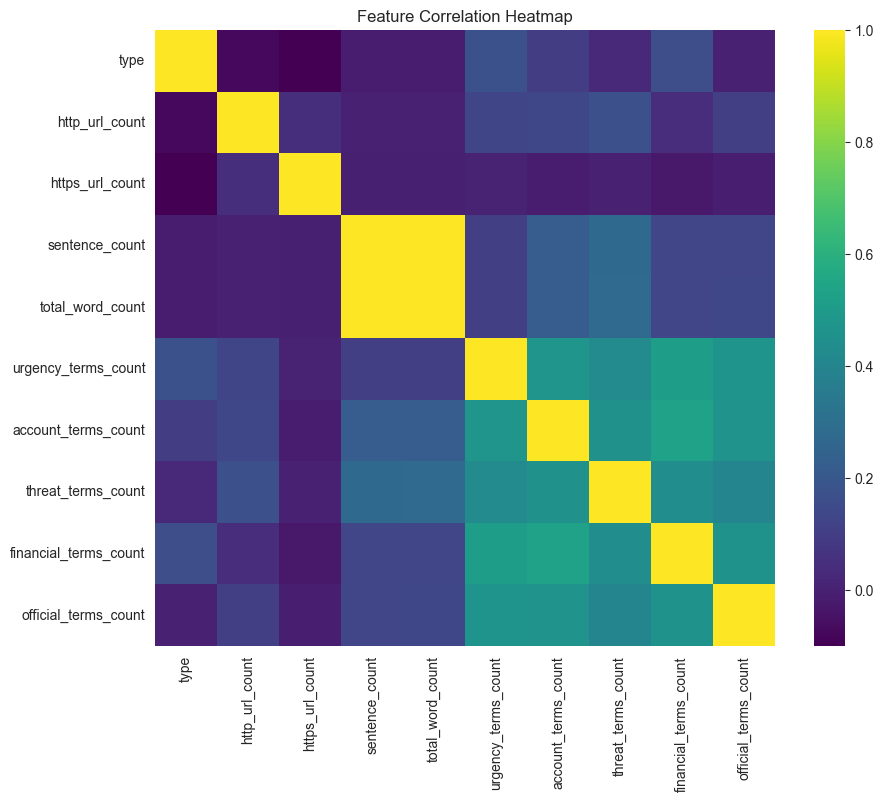

In [30]:

spam_week9_df = sampled_phishing_email_df.copy()
# let mw create heat map using sns

correlation_matrix = spam_week9_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()


In [31]:
#let me remove outlier beyond 1.5IQR for the total word count

def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned = df_cleaned[
            (df_cleaned[column] >= lower_bound) &
            (df_cleaned[column] <= upper_bound)
        ]

    return df_cleaned
spam_week9_df= remove_outliers (spam_week9_df,[ "total_word_count"])

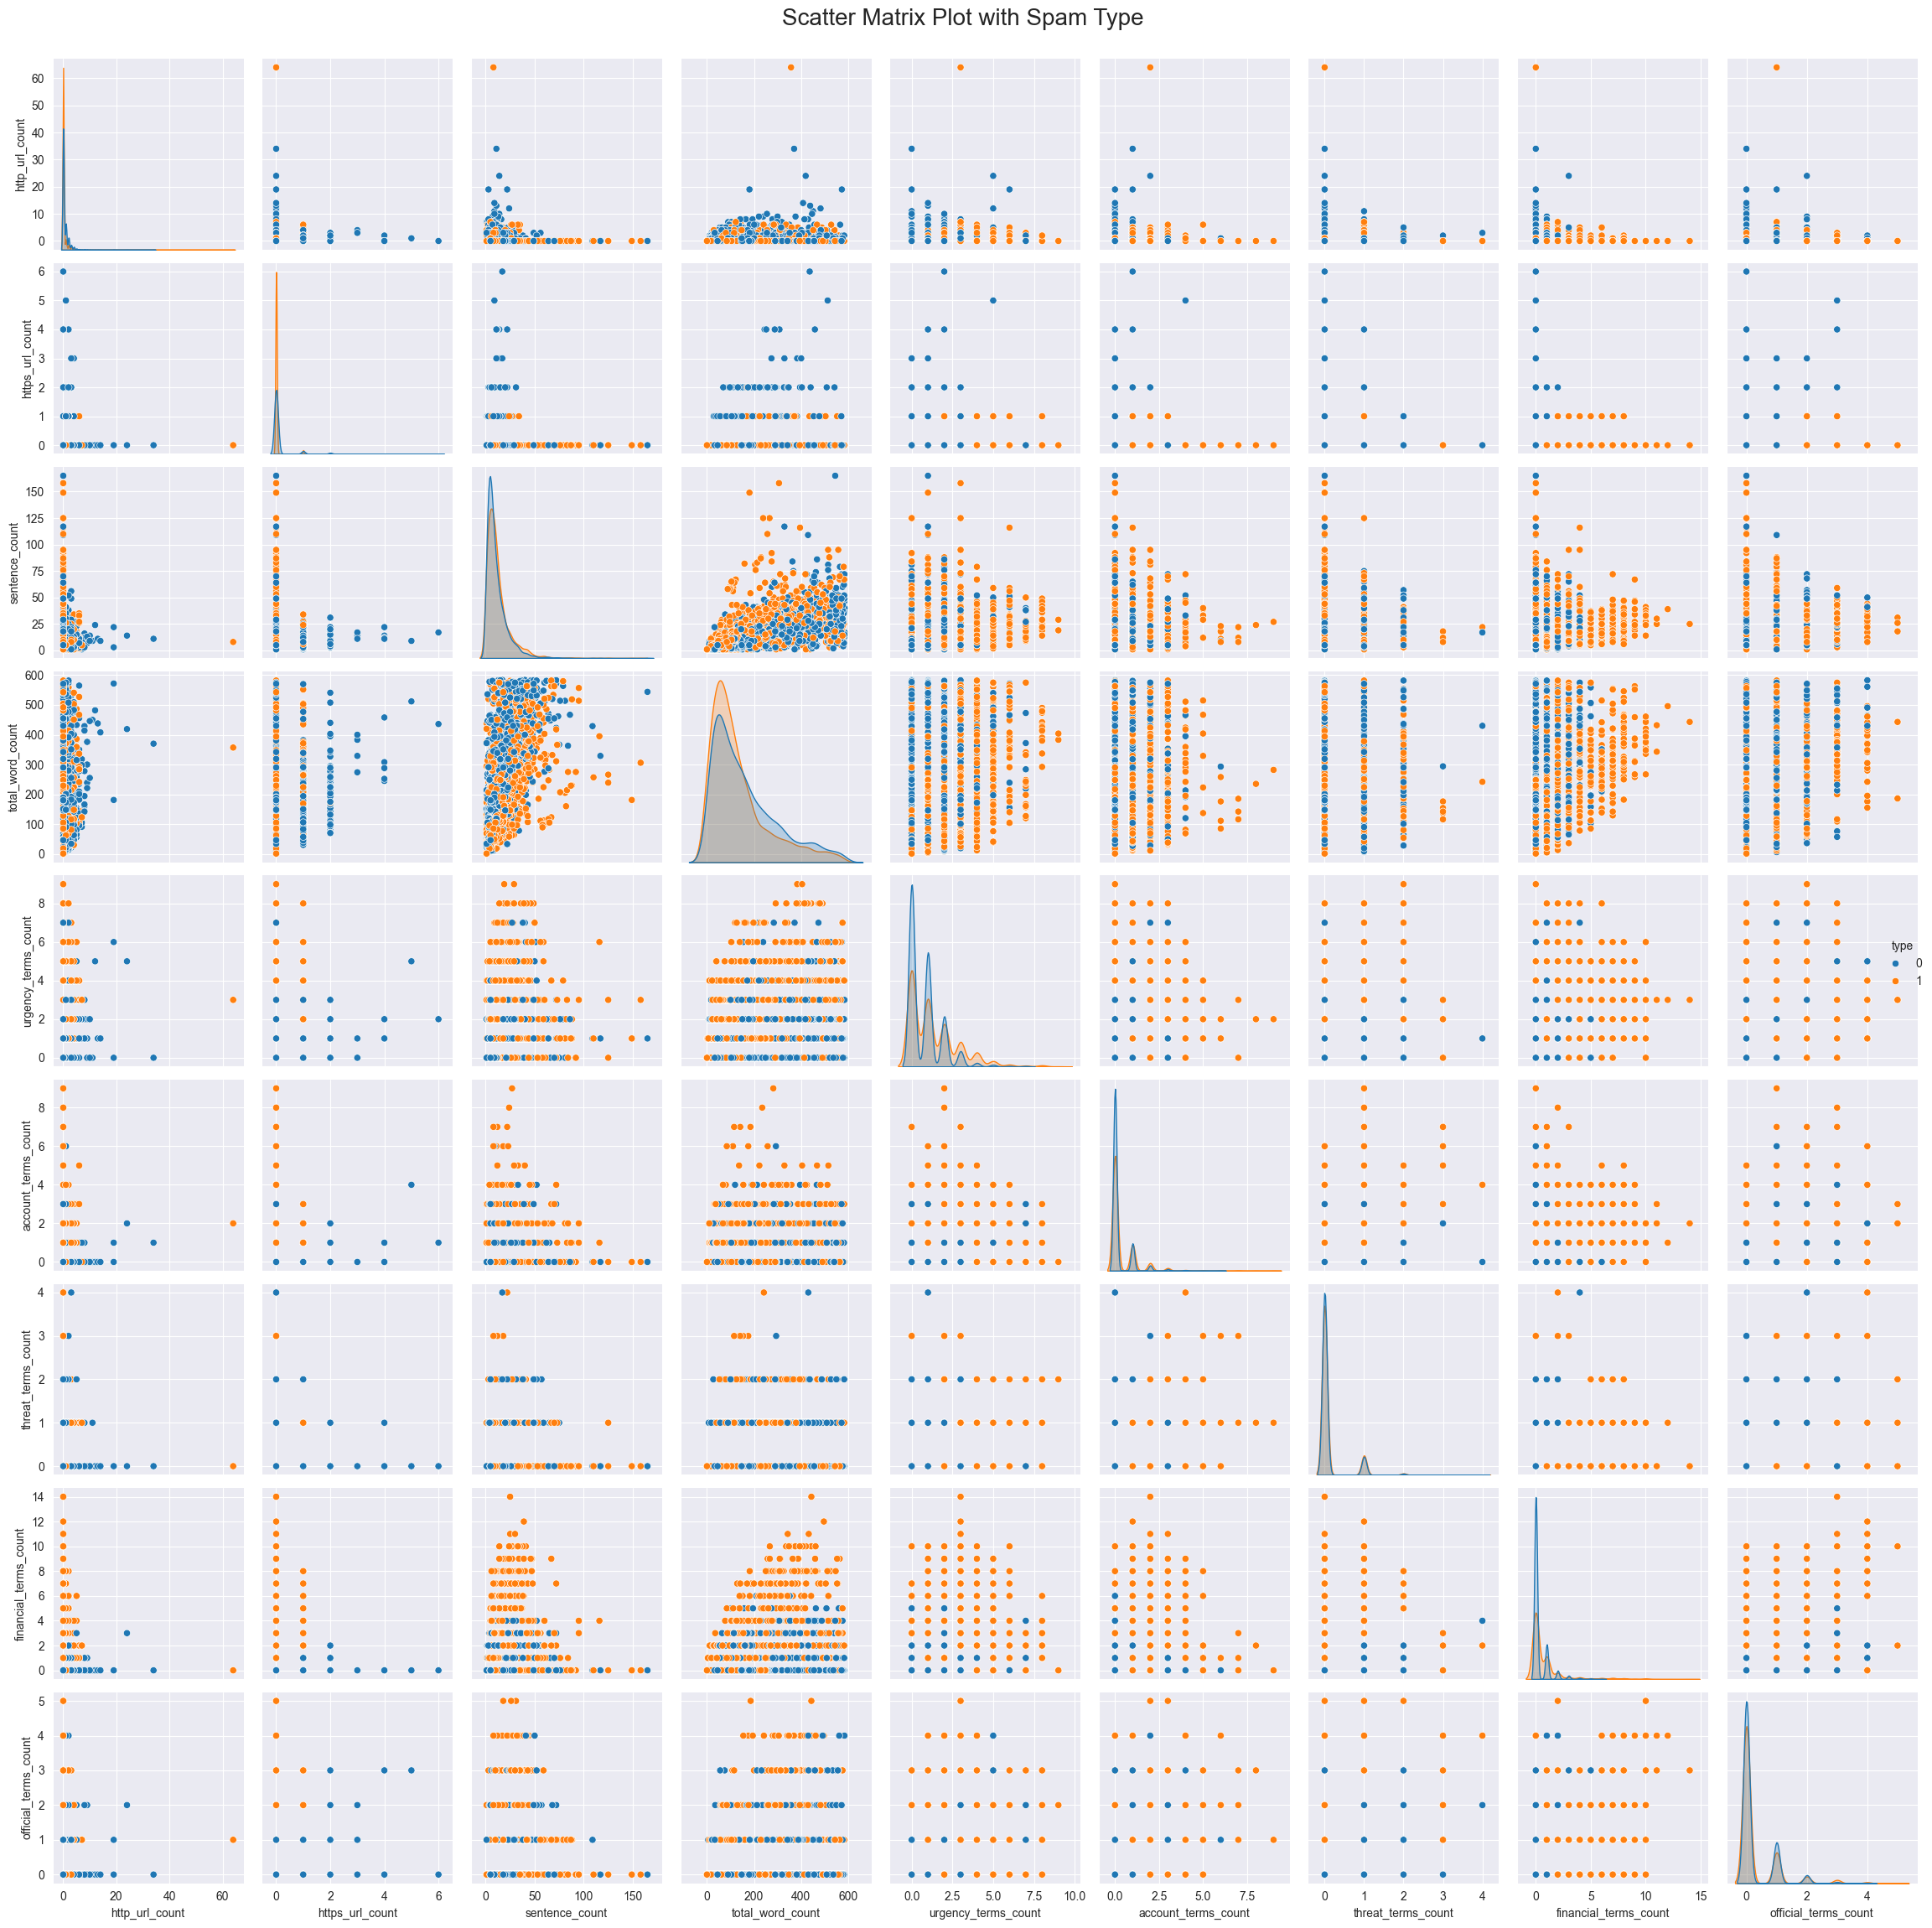

In [47]:
# Using sns to get hue which will give us better visual queue
snsplot = sns.pairplot(spam_week9_df, hue='type')
plt.tight_layout()
plt.suptitle('Scatter Matrix Plot with Spam Type', fontsize=20, y=1.02)
'''
snsplot.savefig('pairplot.png',
          dpi=300,
          bbox_inches='tight'
)

'''
plt.show()



<Figure size 800x600 with 0 Axes>

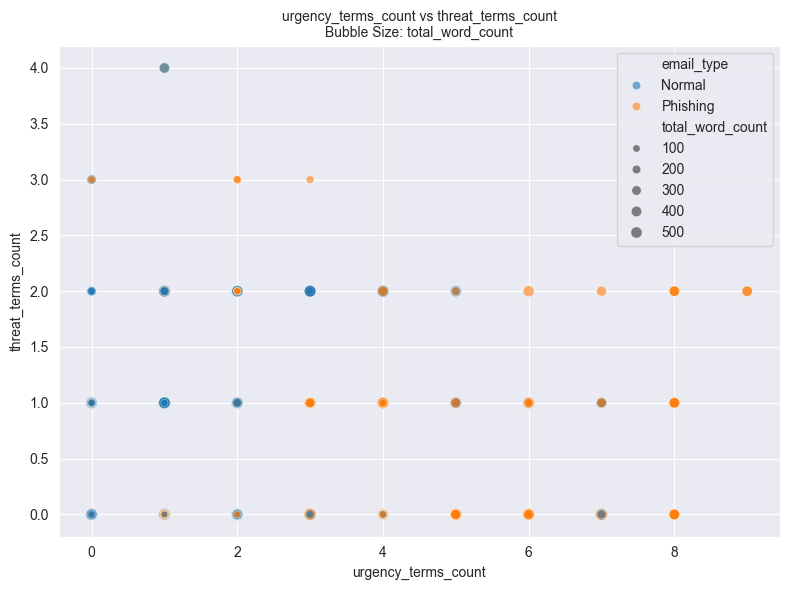

In [46]:
plot_df = spam_week9_df[['total_word_count', 'urgency_terms_count', 'threat_terms_count', 'type']].copy()
plot_df['email_type'] = plot_df['type'].map({0: 'Normal', 1: 'Phishing'})
plt.figure(figsize=(8, 6))

# i need the features to plt
x_feature = 'urgency_terms_count'
y_feature = 'threat_terms_count'
bubble_feature = 'total_word_count'

# this is standard stuff needed for the bubble plot nothing fancy
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x=x_feature,
    y=y_feature,
    size=bubble_feature,  # size shows the third feature word_count
    hue='email_type',
    alpha=0.6
)

plt.title(f'{x_feature} vs {y_feature}\nBubble Size: {bubble_feature}', fontsize=10)
plt.xlabel(x_feature)
plt.ylabel(y_feature)

plt.tight_layout()
plt.show()


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18631 entries, 0 to 18630
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   type                   18631 non-null  int64
 1   http_url_count         18631 non-null  int64
 2   https_url_count        18631 non-null  int64
 3   sentence_count         18631 non-null  int64
 4   total_word_count       18631 non-null  int64
 5   urgency_terms_count    18631 non-null  int64
 6   account_terms_count    18631 non-null  int64
 7   threat_terms_count     18631 non-null  int64
 8   financial_terms_count  18631 non-null  int64
 9   official_terms_count   18631 non-null  int64
dtypes: int64(10)
memory usage: 1.4 MB


[0.32318177 0.12548429 0.1128399  0.10134873 0.08855016 0.07854073
 0.0754366  0.06549526 0.02912256]
[[ 0.03716349  0.00924518  0.41710076  0.46272076  0.36946747  0.35573878
   0.26848241  0.37687092  0.36507407]
 [ 0.72620537  0.62141372 -0.1691118   0.06378506  0.16117486 -0.05657146
   0.0913308  -0.12554869 -0.02284656]
 [-0.18880279  0.32440765  0.51362082  0.42170389 -0.10060309 -0.33013125
  -0.46854891 -0.27452938 -0.05882661]
 [-0.56688507  0.7024674  -0.16569956 -0.1429943  -0.16505932  0.20079765
   0.18944226  0.17208768  0.06488715]
 [-0.13306203 -0.04709425  0.15724497  0.1027331   0.00718773 -0.39534852
   0.79674515 -0.37414261 -0.11687138]
 [ 0.02362561 -0.02841786 -0.14900546 -0.07053918 -0.18640757 -0.30264799
  -0.03779387 -0.13488988  0.90856404]
 [-0.2561102   0.04992868 -0.17547929 -0.1676963   0.83955279 -0.37708851
  -0.15201012  0.05139555  0.0143685 ]
 [ 0.11139694  0.01995715  0.0191564   0.05114747 -0.24395626 -0.57510267
   0.06450631  0.75830352 -0.1215

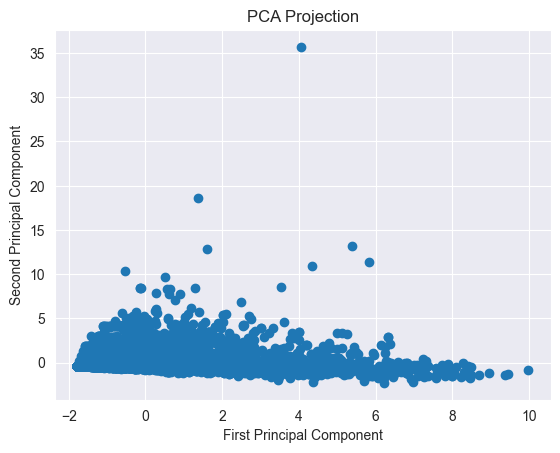

In [37]:
#calculate the PCA
pca3 = decomposition.PCA()

# Store the features dataframe without the target column
pca_df = spam_week9_df.drop(columns=['type'])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# Fit PCA on your features
pca3.fit(scaled_data)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

# Calculate dot products using the SAME dataframe you fitted on
first_principal_component_score = scaled_data.dot(pca3.components_[0])
second_principal_component_score = scaled_data.dot(pca3.components_[1])

# Create the scatter plot
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')
plt.show()


Explained variance by PCA component:
  Principal Component  Explained Variance Ratio  Cumulative Explained Variance
0                 PC1                  0.323182                       0.323182
1                 PC2                  0.125484                       0.448666
2                 PC3                  0.112840                       0.561506
3                 PC4                  0.101349                       0.662855
4                 PC5                  0.088550                       0.751405
5                 PC6                  0.078541                       0.829946
6                 PC7                  0.075437                       0.905382
7                 PC8                  0.065495                       0.970877
8                 PC9                  0.029123                       1.000000


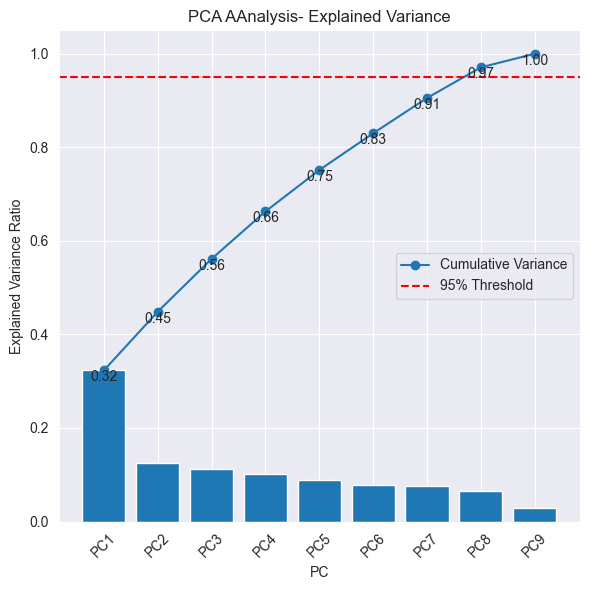

In [38]:
variance_contribution_df = pd.DataFrame({
    'Principal Component': ['PC' + str(i+1) for i in range(len(pca3.explained_variance_ratio_))],
    'Explained Variance Ratio': pca3.explained_variance_ratio_,
})
variance_contribution_df['Cumulative Explained Variance'] = variance_contribution_df['Explained Variance Ratio'].cumsum() # create this column to get the cummulative variance
print("Explained variance by PCA component:")
print(variance_contribution_df)
plt.figure(figsize=(6,6))
plt.bar(variance_contribution_df['Principal Component'], variance_contribution_df['Explained Variance Ratio'])

plt.plot(variance_contribution_df['Principal Component'], variance_contribution_df['Cumulative Explained Variance'], 'o-',label='Cumulative Variance')
for i, value in enumerate(variance_contribution_df['Cumulative Explained Variance']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontsize=10)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')

plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA AAnalysis- Explained Variance')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feature contributions to first principal component:
                 Feature   Loading  Squared Loading  Contribution %
3       total_word_count  0.462721         0.214110       21.411050
2         sentence_count  0.417101         0.173973       17.397304
7  financial_terms_count  0.376871         0.142032       14.203169
4    urgency_terms_count  0.369467         0.136506       13.650621
8   official_terms_count  0.365074         0.133279       13.327908
5    account_terms_count  0.355739         0.126550       12.655008
6     threat_terms_count  0.268482         0.072083        7.208281
0         http_url_count  0.037163         0.001381        0.138112
1        https_url_count  0.009245         0.000085        0.008547


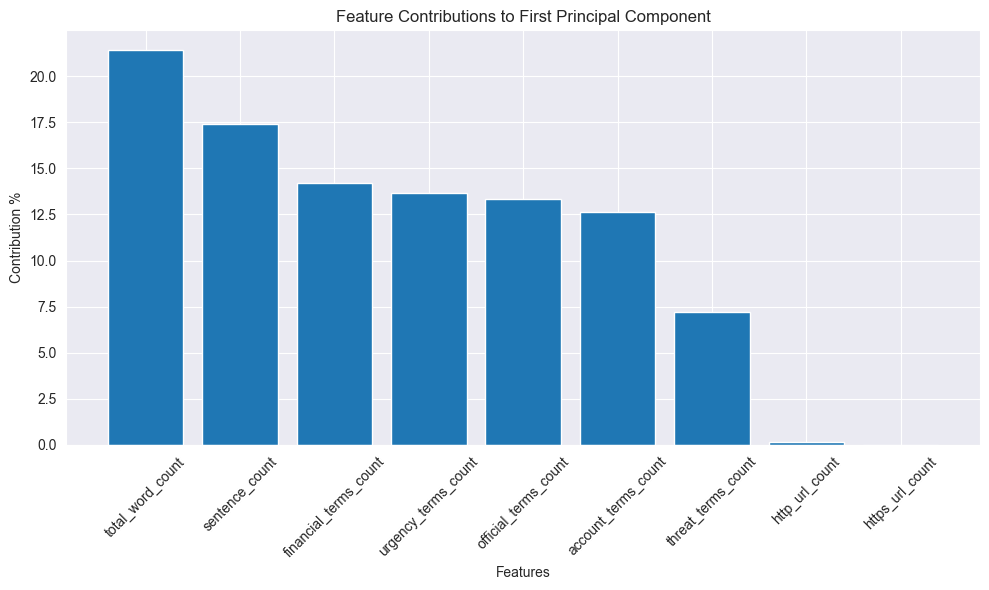

In [42]:
#let me look into contributions of each feature in first pc
pc_1 = pca3.components_[0]
feature_names = pca_df.columns

# Calculate squared loadings for variance contribution to calculate contribution of variance. I f dont use square it wil give error due to +ve ana -ve
squared_loadings = pc_1**2
percent_contribution = squared_loadings / squared_loadings.sum() * 100

# let me add to a df to sue it later
contributions_df = pd.DataFrame({
    'Feature': feature_names,
    'Loading': pc_1,
    'Squared Loading': squared_loadings,
    'Contribution %': percent_contribution
})
contributions_df = contributions_df.sort_values('Contribution %', ascending=False)
print("Feature contributions to first principal component:")
print(contributions_df)

plt.figure(figsize=(10, 6))
plt.bar(contributions_df['Feature'], contributions_df['Contribution %'])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Contribution %')
plt.title('Feature Contributions to First Principal Component')
plt.tight_layout()
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

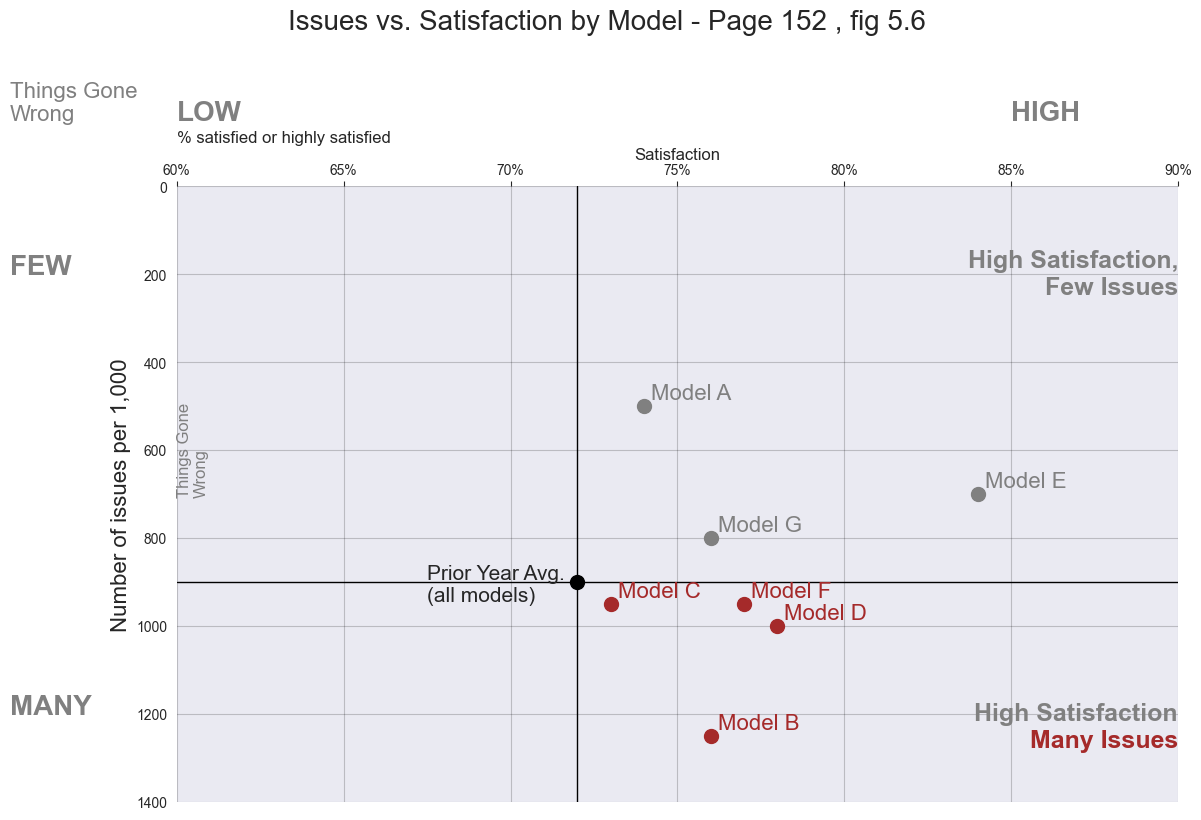

In [43]:
# create data
models = ['Model A', 'Model G', 'Model E', 'Model C', 'Model D', 'Model F', 'Model B']
satisfaction = [74, 76, 84, 73, 78, 77, 76]  # Percentage
issues = [500, 800, 700, 950, 1000, 950, 1250]  # Number of issues

colors = []
for i in range(len(models)):
    if satisfaction[i] == 70 and issues[i] == 900:  # Intersection of axes
        colors.append('black')
    elif issues[i] > 900:  # Issues above 900
        colors.append('brown')
    else:  # Default color
        colors.append('gray')

fig, ax = plt.figure(figsize=(12, 8)), plt.gca()

fig.suptitle('Issues vs. Satisfaction by Model - Page 152 , fig 5.6', fontsize=20, y=1.02)

ax.grid(True, which='major', color='black', linestyle='-', alpha=0.2)

# add the axes  in between  vertical  line at 72% and horizontal at 900 for prior year aveerage
ax.axvline(x=72, color='black', linestyle='-', linewidth=1)
ax.axhline(y=900, color='black', linestyle='-', linewidth=1)

for i in range(len(models)):
   ax.scatter(satisfaction[i], issues[i], c=colors[i], s=100)
   ax.annotate(models[i], (satisfaction[i], issues[i]),
               xytext=(5, 5), textcoords='offset points',
               color=colors[i], fontsize=16)

# need to add the prior year avg. point this is tricky
ax.scatter([72], [900], c='black', s=100)
ax.annotate('Prior Year Avg.\n(all models)', (70, 880),
           xytext=(-60, -20), textcoords='offset points', fontsize = 15)

# let me invert the Y axes
ax.set_xlim(60, 90)
ax.set_ylim(1400, 0)  # Inverted y-axis

# let me invert the x axis too - move x-axis to top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

#  let me put the % marker "f" is really powerful use more going forward
ax.set_xticks(np.arange(60, 95, 5))
ax.set_xticklabels([f'{x}%' for x in range(60, 95, 5)])

ax.set_yticks(np.arange(0, 1401, 200))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# let me add all the labels,, there are way too many
ax.text(90, 200, 'High Satisfaction,\nFew Issues',
        fontsize=18, ha='right', va='center', color='gray', weight='bold')
ax.text(90, 1200, 'High Satisfaction',
        fontsize=18, ha='right', va='center', color='gray', weight='bold')
ax.text(90, 1200, '\n\nMany Issues',
        fontsize=18, ha='right', va='center', color='brown', weight='bold')

ax.text(60, -150, 'LOW', fontsize=20, color='gray', weight='bold')
ax.text(85, -150, 'HIGH', fontsize=20, color='gray', weight='bold')
# Add FEW/MANY labels to left of y-axis
ax.text(55, 200, 'FEW', fontsize=20, color='gray', weight='bold')
ax.text(55, 1200, 'MANY', fontsize=20, color='gray', weight='bold')


ax.text(55, -150, 'Things Gone\nWrong', fontsize=16, color='gray')
ax.text(60,-100, '% satisfied or highly satisfied', fontsize=12)

ax.text(60, 700, 'Things Gone\nWrong', fontsize=12, color='gray', rotation=90)


plt.title('Satisfaction', pad=20)

ax.set_ylabel('Number of issues per 1,000', fontsize=16)

plt.tight_layout()
plt.show()